<a href="https://colab.research.google.com/github/Felixwkk/stocks/blob/master/stock_checklist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

One-year Price chart with 50-day moving average.

1.   Buying a stock while it’s in a downtrend is dangerous, as it will likely move lower. A stock is in a downtrend if its price is below its moving average (MA), and in an uptrend if above. Use the 50-day Simple Moving Average (SMA). 
2.   O.K. to buy if stock price is above its 50-day moving average.




In [0]:
import numpy as np
import pandas as pd
import pandas_datareader as spr
import matplotlib.pyplot as plt
import datetime 
from datetime import timedelta
from bs4 import BeautifulSoup
import requests

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (25,12)

AEM analysis example

In [2]:
# pick a AEM symbol from Yahoo Finance

stocks = spr.get_data_yahoo('AWX.SI', start = datetime.datetime(2015,1,1), end = datetime.datetime(2020,2,11))
stocks.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,0.09000,0.08667,0.08667,0.09000,29400.0,0.060804
2015-01-05,0.09000,0.09000,0.09000,0.09000,0.0,0.060804
2015-01-06,0.08667,0.08667,0.08667,0.08667,60000.0,0.058554
2015-01-07,0.08667,0.08667,0.08667,0.08667,0.0,0.058554
2015-01-08,0.08667,0.08667,0.08667,0.08667,0.0,0.058554


In [0]:
stocks = stocks.reindex(index = stocks.index[::-1]) # reindex from latest date

In [4]:
stocks.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-12,2.00,1.93,1.95,2.00,4005400.0,2.00
2020-02-11,1.96,1.90,1.90,1.95,9512400.0,1.95
2020-02-10,1.89,1.81,1.83,1.88,3480400.0,1.88
2020-02-07,1.95,1.86,1.95,1.87,6246400.0,1.87
2020-02-06,1.97,1.91,1.94,1.96,6254700.0,1.96


In [0]:
# moving average of 20, 50, 200 days
df = stocks 
df['SMA_20'] = df.iloc[:,1].rolling(window=20).mean()
df['SMA_50'] = df.iloc[:,1].rolling(window=50).mean()
df['SMA_200'] = df.iloc[:,1].rolling(window=200).mean()


In [6]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,SMA_20,SMA_50,SMA_200
Date,,,,,,,,,
2020-02-12,2.00,1.93,1.95,2.00,4005400.0,2.00,NaN,NaN,NaN
2020-02-11,1.96,1.90,1.90,1.95,9512400.0,1.95,NaN,NaN,NaN
2020-02-10,1.89,1.81,1.83,1.88,3480400.0,1.88,NaN,NaN,NaN
2020-02-07,1.95,1.86,1.95,1.87,6246400.0,1.87,NaN,NaN,NaN
2020-02-06,1.97,1.91,1.94,1.96,6254700.0,1.96,NaN,NaN,NaN


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


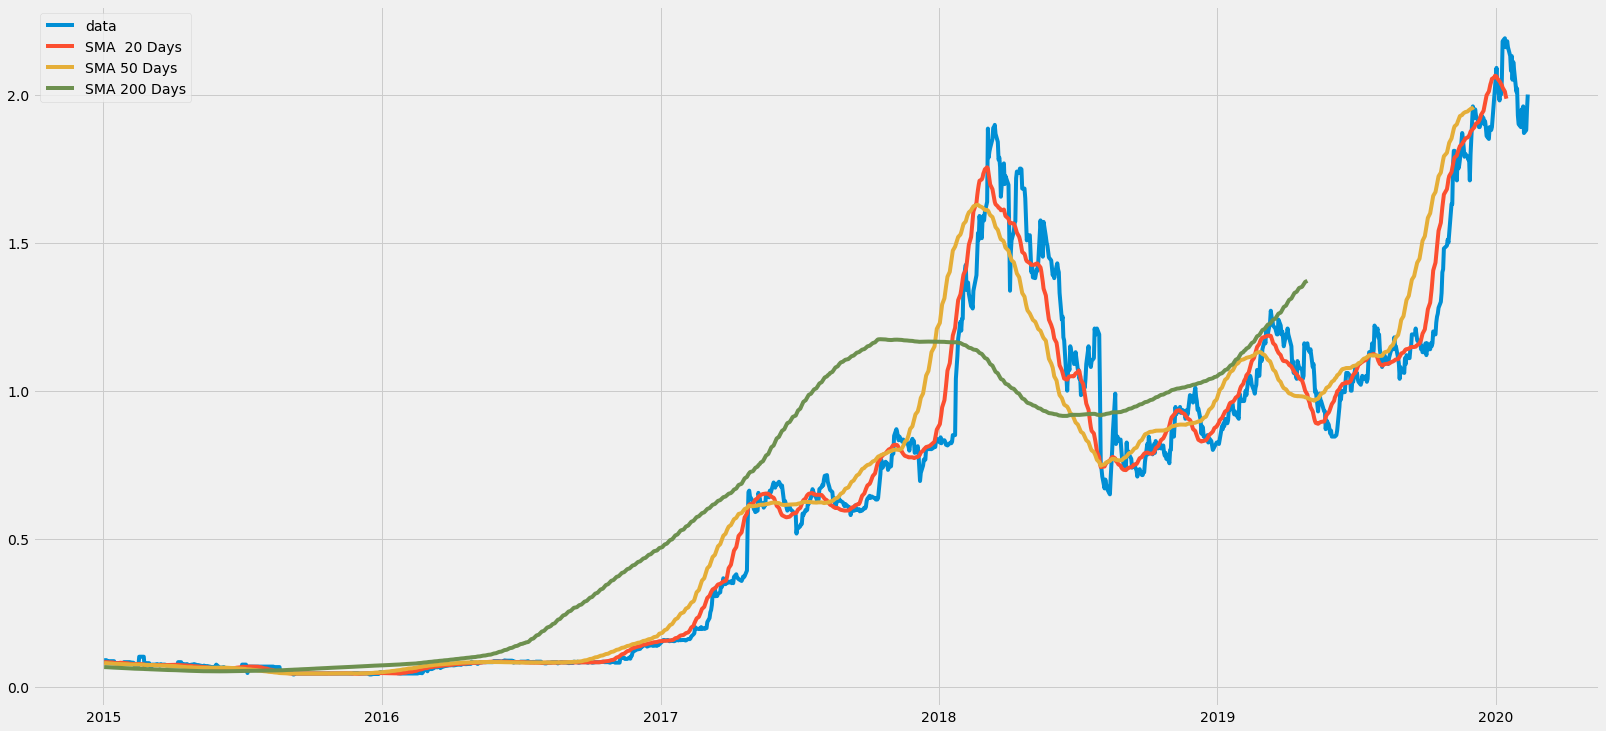

In [7]:
plt.grid(True)
plt.plot(df['Close'],label='data')
plt.plot(df['SMA_20'],label='SMA  20 Days')
plt.plot(df['SMA_50'],label='SMA 50 Days')
plt.plot(df['SMA_200'], label = 'SMA 200 Days')
plt.legend(loc=2)

In [8]:
df['Close'][0]
print('Latest Stock price :-', df['Close'][0])
print('50 Days moving average :-' ,df['SMA_50'][49])
if df['Close'][0] >= df['SMA_50'][49]:
  print('Is the stock price above the 50 days moving average ? Yes, Buy')
else:
  print('Do not Buy')

Latest Stock price :- 2.0
50 Days moving average :- 1.9573999905586243
Is the stock price above the 50 days moving average ? Yes, Buy


Price/Sales ratio (P/S)

1.   Valuation check. A stock with a P/S above 10 is momentum priced.
2.   O.K. to buy if P/S is less than 10. P/S ratios between 3 and 5 are best for growth stocks.
3.   Ratios below 2 reflect value priced stocks.  





In [0]:
url = 'https://sg.finance.yahoo.com/quote/AWX.SI/key-statistics?p=AWX.SI'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')


In [48]:
# web scrape to find price/sales ratio
price_sales = soup.find_all('span',attrs ={'data-reactid':'53'})
price_sales_number = soup.find('td',attrs = {'data-reactid' :'57'} )
print('Price.Sales Ratio :- ', price_sales_number.text)
if float(price_sales_number.text) < 5:
  print('Stock is ok to Buy')
else:
  print('DO not buy')

Price.Sales Ratio :-  2.05
Stock is ok to Buy


Cash Flow

1.   Companies with positive operating cash flow are safer investments than cash burners (negative cash flow). 
2.   O.K. to buy if Cash Flow is a positive number. def value_to_float(x):
    




In [141]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    if ',' in x:
        return float(x.replace(',',''))
    return 0.0


# Find cash flow
cash = soup.find_all('td', class_ = 'Fz(s) Fw(500) Ta(end) Pstart(10px) Miw(60px)')
cash_flow = soup.find('td', attrs = {'data-reactid' : '496'})
cash_flow_lever = soup.find('td', attrs = {'data-reactid' : '503'})

print('Operating cash flow :-', cash_flow.text)
print('Levered free cash flow :-' , cash_flow_lever.text)

if value_to_float(cash_flow.text) >0:
  print('Stock can buy as the cash flow is positive')
else:
  print('Stock cannot buy')

Operating cash flow :- 38.64M
Levered free cash flow :- 26.35M
Stock can buy as the cash flow is positive


Average Daily Volume (shares)


1.   O.K. to buy if Average Daily Volume is 150,000 shares or higher, and above one million shares is best. 




In [91]:
print(' Average Volume of share in pase 100 days :-', df['Volume'][0:100].mean())
print('Today"s volume :- ', df['Volume'][0])
if df['Volume'][0] < 150000:
  print('Stock cannot buy')
elif df['Volume'][0]> 1000000:
  print('Good Volume')
    

 Average Volume of share in pase 100 days :- 6862904.0
Today"s volume :-  4005400.0
Good Volume


Got Growth 

1.   O.K. to buy if recent quarterly growth numbers are 8% min. (higher is better). Best case is when year-over-year (YoY) growth is accelerating.




In [0]:
# new url
new_url = 'https://sg.finance.yahoo.com/quote/AWX.SI/financials?p=AWX.SI'
new_page = requests.get(new_url)
revenue_soup = BeautifulSoup(new_page.content,'html.parser')

In [235]:
# read last quarters revenue
revenue_q = revenue_soup.find('span' , attrs = {'data-reactid': '49'})
revenue_q1 = revenue_soup.find('span', attrs = {'data-reactid':'51'})

print('Current year Revenue :-', revenue_q.text)
print('Previous year revenue :-', revenue_q1.text)

if value_to_float(revenue_q.text) > value_to_float(revenue_q1.text):
  print('Current year revenue is higher. Stock can buy')
else:
  print('Last year revenue is higher. Stock cannot buy')

Current year Revenue :- 273,832
Previous year revenue :- 262,325
Current year revenue is higher. Stock can buy


Number of Analysts Making Buy/Hold/Sell Recs.


1.   O.K. to buy if a total of at least four analysts are listed as currently making strong buy, buy, hold, underperform, or sell recommendations. 
2.   Look only at the total number of analysts making recommendations, not whether there are more buys than holds, etc. 



In [0]:
broker_url = 'https://sginvestors.io/sgx/stock/awx-aem/target-price'
broker_page = requests.get(broker_url)
soup_broker = BeautifulSoup(broker_page.content, 'html.parser')

In [183]:
#find the number of brokers
broker_count = soup_broker.find_all('div', class_='targetpriceitem')
print('Number of Analysts :-', len(broker_count))
if len(broker_count) <4:
  print('Recommend at least Four Analysts to suggest a BUY')

Number of Analysts :- 3
Recommend at least Four Analysts to suggest a BUY


In [181]:
print('The analysts List :-')
for x in broker_count_number:
  print(x.find('div' , class_='BROKER').text)
  print('Date :', x.find('div', class_='tpdate').text)
  print( x.find('div', class_= 'TPCALLBUY').text)
  print( x.find('div', class_ = 'TPPRICE').text)

The analysts List :-
CGS-CIMB
Date : 2020-01-09
Rating: ADD
Price Target: 2.380
DBS Research
Date : 2019-12-12
Rating: BUY
Price Target: 2.380
Maybank Kim Eng
Date : 2020-02-10
Rating: BUY
Price Target: 2.580


Gross Margin Trend


1.   Changes in gross margin percentages from quarter to quarter point to changes in a company’s competitive position in its marketplace. 
2.   Increasing gross margins signal an improving competitive position, and declining margins warn of increasing competition. 
3.   Gross margin (GM) is the "Gross Income" divided by "Revenue," expressed as a percentage.
4.   Calculate the GM for each of the past 3 or more quarters, and observe the GM trend.

O.K. to buy if the trend is flat or increasing (best). Ignore variations of less than 1%, e.g. from 41% to 40.5%.





In [0]:
# using this trick to find the data-reactid values
profit_q = revenue_soup.find_all('span', attrs= {})
profit_q

In [219]:
profit_q1 = revenue_soup.find('span', attrs= {'data-reactid': '81'})
profit_q2 = revenue_soup.find('span', attrs = {'data-reactid':'83'})
profit_q3 = revenue_soup.find('span', attrs = {'data-reactid': '85'})

print('Gross Margins for current Year :-' , profit_q1.text)
print('Gross Margins for previous Year :-', profit_q2.text)
print('Gross Margins for last two Years :-', profit_q3.text)


Gross Margins for current Year :- 89,103
Gross Margins for previous Year :- 73,023
Gross Margins for last two Years :- 26,234


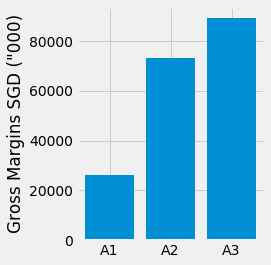

In [218]:
profit = [value_to_float(profit_q3.text),value_to_float(profit_q2.text), value_to_float(profit_q1.text)]
quarters = ['A1','A2','A3']
plt.figure(figsize = (3,4))
plt.bar(quarters, profit)
plt.ylabel('Gross Margins SGD ("000)')
plt.show()

In [215]:
if value_to_float(profit_q1.text) > value_to_float(profit_q2.text) > value_to_float(profit_q3.text):
  print('Stock is good to buy as the gross margins are growing every quarter')
else :
  print('Stock gross marings is not growing')

Stock is good to buy as the gross margins are growing every quarter


In [234]:
def percentage(part, whole):
  return 100 * float(whole - part)/float(whole)

print('Profit growth Current YoY :-', percentage(value_to_float(profit_q2.text),value_to_float(profit_q1.text)),'%')
print('Profit growth Previous Yoy :-', percentage(value_to_float(profit_q3.text), value_to_float(profit_q2.text)),'%')

Profit growth Current YoY :- 18.046530419851184 %
Profit growth Previous Yoy :- 64.07433274447777 %


In [0]:
reuters_income_url = 'https://www.reuters.com/companies/AEM.SI/financials/income-statement-quarterly'
reuters_page = requests.get(reuters_income_url)
reuters_soup = BeautifulSoup(reuters_page.content, 'html.parser')

In [0]:
gross_q = reuters_soup.find_all('td', class_ = 'TextLabel__text-label___3oCVw TextLabel__black___2FN-Z TextLabel__regular___2X0ym digits')

In [434]:
five = 0
gross = []
for x in gross_q:
  five += 1
  if five <= 5:
   gross.append(x.text)       
  else:
    exit
gross = list(map(float, gross)) # convert from string to numbers
gross

[83.85, 97.92, 52.72, 39.35, 84.67]

In [353]:

gross_margins = pd.DataFrame({'Gross': gross, 'Quarters':['Q1','Q2','Q3','Q4','Q5']})
gross_margins

,Gross,Quarters
0,83.85,Q1
1,97.92,Q2
2,52.72,Q3
3,39.35,Q4
4,84.67,Q5


Text(0, 0.5, 'Gross Margins ("000) SGD')

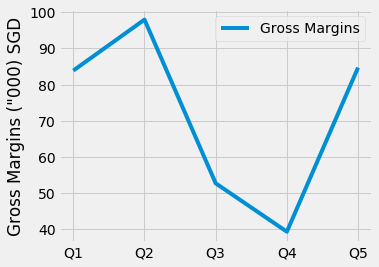

In [390]:
plt.figure(figsize=(5,4))
plt.plot( gross_margins['Quarters'],gross_margins['Gross'])
plt.legend(['Gross Margins'])
plt.ylabel('Gross Margins ("000) SGD')


In [410]:
def growth_cal( values):
  tmp=0
  margin = []

  for x in values:
    z = x - values[tmp+1]
    margin.append(z)
    tmp +=1
    if tmp == 4:
      break
  return margin
margin = growth_cal(gross_margins['Gross'])
margin

[-14.070000000000007, 45.2, 13.369999999999997, -45.32]

In [420]:
print('Quarter One vs Quarter Two Gross Margins :-', margin[0],'%')
print('Quarter Two vs Quarter Three Gross Margins :-', margin[1],'%')
print('Quarter Three vs Quarter Four Gross Margins :-', margin[2],'%')
print('Quarter Four vs Quarter Five Gross Margins :-', margin[3],'%')

if margin[0] > margin[1] > margin[2] > margin[3]:
  print('QonQ growth of gross margins')
elif margin[0] > margin [1]:
  print('Current quarter margin has increased')
else:
  print('Current quarter margin has decreased')

Quarter One vs Quarter Two Gross Margins :- -14.070000000000007 %
Quarter Two vs Quarter Three Gross Margins :- 45.2 %
Quarter Three vs Quarter Four Gross Margins :- 13.369999999999997 %
Quarter Four vs Quarter Five Gross Margins :- -45.32 %
Current quarter margin has decreased


Revenue (sales)  Growth Rate
Latest Quarter compared to previous quarter & most recent year.

1.   Slowing revenue (sales) growth is a “red flag” signaling danger ahead. 
2.   Compare the most recent quarter's (MRQ) year-over-year sales growth rate to previous quarters and to the most recent year.

Ideally, revenue growth would be accelerating or at least equal to earlier numbers. But, it's O.K. to buy if MRQ growth is at least 75% of recent growth numbers. 



In [0]:
revenue_q = reuters_soup.find_all('td', class_ ='TextLabel__text-label___3oCVw TextLabel__black___2FN-Z TextLabel__regular___2X0ym digits')

In [460]:
revenue = []
tmp = 0
for x in revenue_q:
  revenue.append(x.text)
  if tmp >=4:
    break
  tmp+=1
revenue = list(map(float,revenue))
revenue

[83.85, 97.92, 52.72, 39.35, 84.67]

In [461]:
revenue_grow = pd.DataFrame({'Revenue':revenue, 'Quarter': ['Q1','Q2','Q3','Q4','Q5']})
revenue_grow

,Revenue,Quarter
0,83.85,Q1
1,97.92,Q2
2,52.72,Q3
3,39.35,Q4
4,84.67,Q5


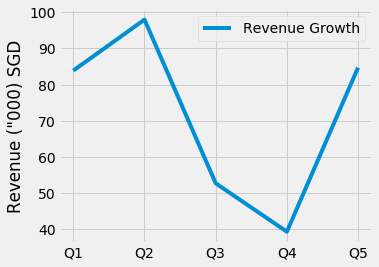

In [465]:
plt.figure(figsize=(5,4))
plt.plot(revenue_grow['Quarter'], revenue_grow['Revenue'] )
plt.legend(['Revenue Growth'])
plt.ylabel('Revenue ("000) SGD')
plt.show()

In [466]:
margin = growth_cal(revenue_grow['Revenue'])
margin

[-14.070000000000007, 45.2, 13.369999999999997, -45.32]

In [469]:
print('Current Quarter vs last quarter Revenue:-' ,margin[0],'%')
print('Last Quarter vs Two quarters Revenue:-', margin[1],'%')
print('Third Quarter vs Fourth quarters Revenue :-', margin[2],'%')
print('Fourth Quarter vs Fifth Quarters Revenue :-', margin[3],'%')

if margin[0] > margin[1] > margin[2] > margin[3]:
  print('Stock can buy as Revenue grow is consistent')
elif margin[0] > margin[1]:
  print('Current quarter revenue is higher than previous quarter')
else:
  print('Current quarter revenue is lower than last quarter')

Current Quarter vs last quarter Revenue:- -14.070000000000007 %
Last Quarter vs Two quarters Revenue:- 45.2 %
Third Quarter vs Fourth quarters Revenue :- 13.369999999999997 %
Fourth Quarter vs Fifth Quarters Revenue :- -45.32 %
Current quarter revenue is lower than last quarter


Forecast Revenue Growth Rate 

1.   Yahoo! Finance
(finance.yahoo.com > ticker symbol >Analysts)
sample

1.   Check the forecast year-over-year revenue growth percentage for the current quarter vs. MRQ growth rate found in the previous step. 

Ideally, the growth rate should be accelerating but it's O.K. to buy if the forecast year-over-year revenue growth is at least 75% of historical year-over-year growth. 

2.   Compare consensus revenue growth forecasts to historical numbers. 



Accounts Receivables Growth vs. Sales Growth


1.   Accounts receivables are monies owed by a company’s customers for goods received. 
The Accounts Receivables Ratio (ratio) is the total receivables divided by the revenue for the same quarter. 
A significantly higher ratio vs. year-ago is a red flag pointing to future problems. 
2.   Compute the ratio for the most recent and the year-ago quarters.

Ideally the most recent ratio would be less than year-ago, but it's O.K. to buy if the ratio is the same or lower than year-ago. Ignore increases that are less than 5%, e.g. from 60% to 64%. 



In [0]:
accounts_url = 'https://www.reuters.com/companies/AEM.SI/financials/balance-sheet-quarterly'
accounts_page = requests.get(accounts_url)
accounts_soup = BeautifulSoup(accounts_page.content, 'html.parser')

In [487]:
accounts_q = accounts_soup.find_all('td', class_ = 'TextLabel__text-label___3oCVw TextLabel__black___2FN-Z TextLabel__regular___2X0ym digits')
accounts = []
row = 0 
for x in accounts_q:
  if row >=10 and row <= 14: # receivable data is found in this row 9
    accounts.append(x.text)
  row +=1
  if row >15:
    break

accounts = list(map(float, accounts))
accounts

[41.42, 53.14, 32.36, 22.46, 32.23]

In [488]:
accounts_grow = pd.DataFrame({'Accounts': accounts, 'Quarters': ['Q1','Q2','Q3','Q4','Q5']})
accounts_grow

,Accounts,Quarters
0,41.42,Q1
1,53.14,Q2
2,32.36,Q3
3,22.46,Q4
4,32.23,Q5


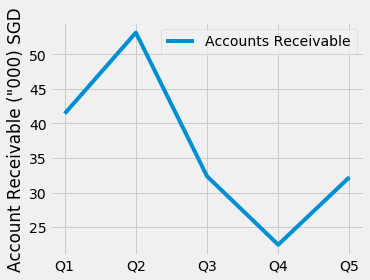

In [489]:
plt.figure(figsize=(5,4))
plt.plot(accounts_grow['Quarters'], accounts_grow['Accounts'])
plt.legend(['Accounts Receivable'])
plt.ylabel('Account Receivable ("000) SGD')
plt.show()

In [490]:
margin = growth_cal(accounts_grow['Accounts'])
margin

[-11.719999999999999, 20.78, 9.899999999999999, -9.769999999999996]

In [492]:
print('Current quarter vs previous quarter accounts receivable :-', margin[0],'%')
print('Previous quarter vs previous quarter accounts receivable :-', margin[1],'%')
print('Third quarter vs Forth quarter accounts receivable :-', margin[2],'%')
print('Forth quarter vs Fifth quarter accounts receivable :-', margin[3],'%')

if margin[0] < margin[1] < margin[3]:
  print('Accounts Receivable is declining, managble')
elif margin[0] > margin[1]:
  print('Current account receivables are higher than preivous quarter. warning on this stock probable bad debts')
else:
  print('Stock account receivable needs to be improved')

Current quarter vs previous quarter accounts receivable :- -11.719999999999999 %
Previous quarter vs previous quarter accounts receivable :- 20.78 %
Third quarter vs Forth quarter accounts receivable :- 9.899999999999999 %
Forth quarter vs Fifth quarter accounts receivable :- -9.769999999999996 %
Stock account receivable needs to be improved
